# *학습 관련 기술들*

## 2. 가중치의 초기값



- 신경망 학습에서 특히 중요한 것이 가중치의 초기값임
- 초기 값에 따라 학습의 성패가 갈리는 경우가 종종 생기기도 함
___

### 1) 초기값을 0으로 하면?
- **Weight Decay(가중치 감소)** 기법은 가중치 값을 작게 하여 오버피팅을 방지하며 학습하는 방법임
- 이에 따라 [0.01 * np.random.randn(10, 100)]처럼 정규분포에서 생성된 작은 무작위 값을 초기값으로 세팅
- 한편, 초기값을 모두 0, 또는 같은 값으로 설정하면, 갱신을 거쳐도 같은 값을 유지하게 되어 ('곱셈노드 역전파' 참조) 다중의 가중치 세팅이 무의미해짐
- 따라서 가중치는 초기값을 무작위로 설정해야 하며, 가능한 가중치 값을 작게 세팅하는 것이 오버피팅 방지에 도움이 됨
___

### 2) 은닉층의 활성화값 분포
- 은닉층의 활성화 출력값 분포를 관찰하면 중요한 정보 획득 가능
- 예제 - 5층 신경망에 무작위값 입력으로 활성화 출력값 분포 확인

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000,100)    #(1000,100) matrix
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) *1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

- 입력신호 $x$에 가중치 $w$을 곱하고 $sigmoid$로 활성화 한 값들을 5개의 노드로 구성하여 연산
- 연산 값들은 activations 딕셔너리에 저장
>- 위에서는 표준편차가 1인 정규분포로부터 입력신호 값을 추출하였으나, **표준편차를 바꿔가며 활성화 출력값의 분포변화 확인**

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

Populating the interactive namespace from numpy and matplotlib


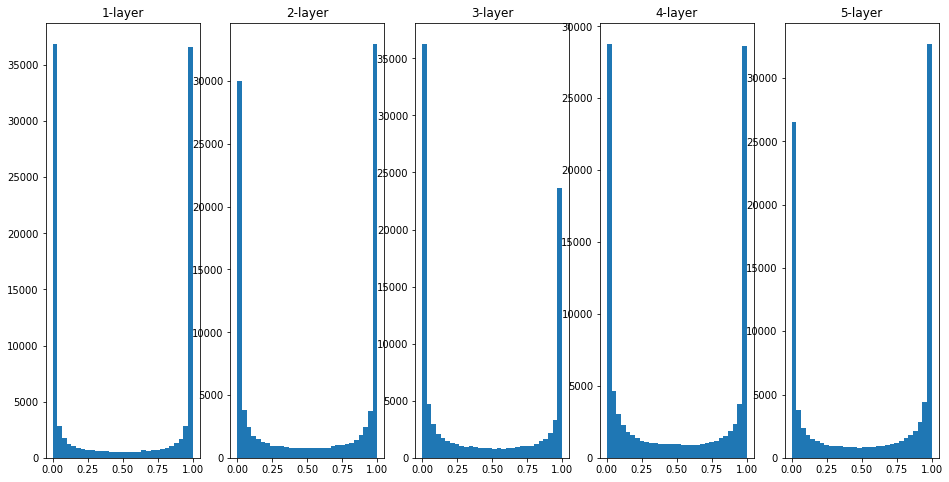

In [11]:
for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

- 활성화 값들이 0과 1에 치우쳐 분포
- 이 경우 시그모이드함수는 출력이 0이나 1에 가까워질수록 미분이 0에 근사
- 역전파의 기울기값이 작아지다가 사라지는 **gradient vanishing(기울기 소실)** 문제를 야기할 수 있음

- 가중치 $w$의 표준편차를 0.01로 바꿔 실험을 반복

In [12]:
x = np.random.randn(1000,100)    #(1000,100) matrix
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
  # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

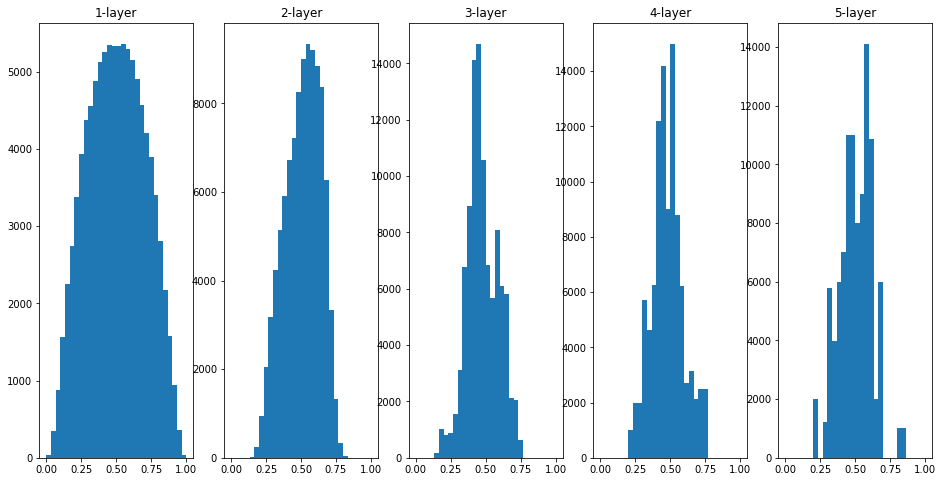

In [13]:
for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

- 표준편차를 0.01로 한 정규분포의 경우 각 층의 활성화 출력값 분포는 0.5에 집중되는 경향을 보임
- 0과 1에 치우치지 않았기에 gradient vanishing 문제는 해결
- 하지만 활성화 출력값이 집중되었다는 것은 같은 값을 반환하는 뉴런이 여럿 있고, **표현력을 제한**하는 문제를 야기

- 가중치 초기값을 사비에르 글로로트와 요수아 벤지오 논문에서 권장한 **Xavier 초기값** 사용
- 이는 표준편차를 $\frac{1}{\sqrt n}$으로 사용하는 초기값이고, 여기서 $n$은 앞 계층의 노드 수를 의미
![](image/fig 6-12.png)

In [14]:
x = np.random.randn(1000,100)    #(1000,100) matrix
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
  # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

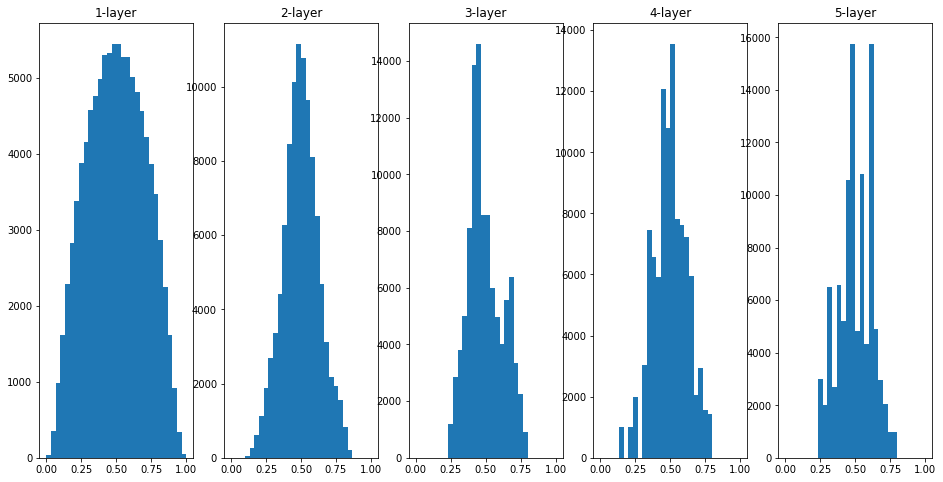

In [15]:
for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

- 위의 두 예시보다 효율적으로 학습이 이뤄질 것으로 기대 가능
___

### 3) ReLU를 사용할 떄의 가중치 초기값

- Xavier 초기값은 선형 활성화 함수를 가정
- $sigmoid$나 $tanh$ 함수는 좌우 대칭이라 중앙 부근이 선형이 함수로 볼 수 있음
- 반면 $ReLU$의 경우 ReLU에 특화된 **He 초기값** 사용을 권장
- He 초기값은 표준편차가 $\sqrt\frac{2}{n}$인 정규분포를 사용 (ReLU는 음의 영역이 0이기 때문에 더 넓게 분포시키기 위해 2배의 계수가 필요)
![](image/fig 6-14.png)

- 위의 결과를 보면, $std=0.01$의 경우 활성화 결과 값들이 아주 작은 값으로 실제로 거의 학습이 이루어 지지 않을 것
- $Xavier$ 초기값은 층이 깊어질수록 활성화 결과 값의 치우침이 커지고, gradient diminishing 문제를 야기
- $He$ 초기값은 모든 층에서 분포가 고르기 때문에 적절한 결과값을 기대할 수 있음
> - 활성화 함수가 ReLU일 때는 $He$ 초기값을 권장
>- 활성화 함수가 $sigmoid$나 $tanh$ 등 S자 모양 곡선일때는 $Xavier$ 초기값을 권장

___

### 4) MNIST 데이터셋으로 본 가중치 초기값 비교

===========iteration:0===========
std=0.01:2.3024520756820066
Xavier:2.313352249627239
He:2.4449238030022906
===========iteration:100===========
std=0.01:2.3018959780165273
Xavier:2.258670735995032
He:1.5320038242911376
===========iteration:200===========
std=0.01:2.3023378001770896
Xavier:2.1365023485267223
He:0.7686097916867538
===========iteration:300===========
std=0.01:2.3026250088639904
Xavier:1.7974734763945905
He:0.48641462588773826
===========iteration:400===========
std=0.01:2.30422321077467
Xavier:1.3656373833083841
He:0.5834220066100266
===========iteration:500===========
std=0.01:2.301418991349496
Xavier:0.9447957562405245
He:0.4940054000185936
===========iteration:600===========
std=0.01:2.299226724237033
Xavier:0.5318288224932753
He:0.2600859320221684
===========iteration:700===========
std=0.01:2.301694826165121
Xavier:0.5853800470160329
He:0.27702498055218583
===========iteration:800===========
std=0.01:2.304347361106927
Xavier:0.5894739430665907
He:0.3481643172107494


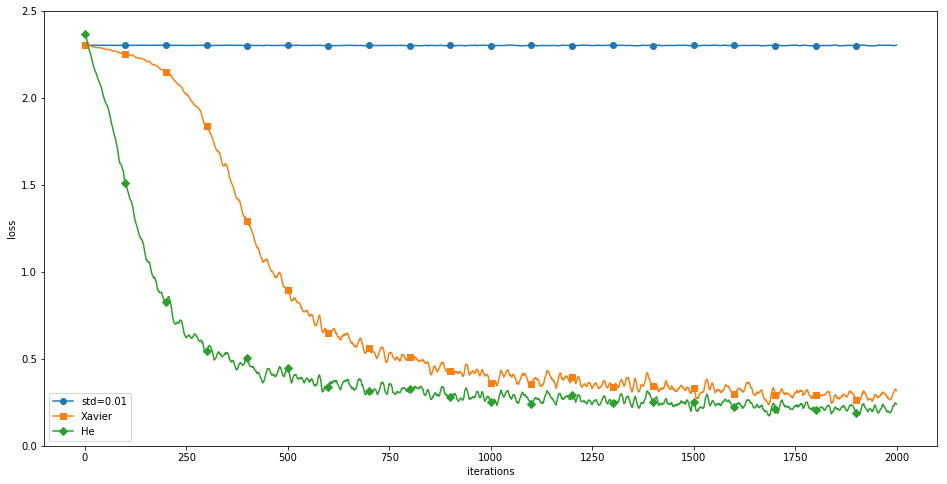

In [31]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from data.mnist import load_mnist
from data.util import smooth_curve
from data.multi_layer_net import MultiLayerNet
from data.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


- 위의 예제는 ReLU 함수를 사용
- $std = 0.01$을 사용하였을 때는 학습의 전혀 이루어지지 않음
- $Xavier$와 $He$ 사용 시 학습이 순조롭게 진행
- 단 $He$의 학습 진도가 조금 더 빠른 편